In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud

In [2]:
df = pd.read_csv("../data/dataset.csv", na_values=["_NULL_"], keep_default_na=False)

In [3]:
df.shape

(362806, 14)

In [4]:
tp = df["test_performed"].str.lower()

display(tp.notna().sum())
display(tp.isna().sum())

362806

0

In [5]:
tp.value_counts(dropna=True)

yes        340474
no          22114
pending       218
Name: test_performed, dtype: int64

In [6]:
to = df["test_outcome"].str.lower()

display(to.notna().sum())
display(to.isna().sum())

115347

247459

In [7]:
to.value_counts(dropna=True)

*missing         79377
positive         19249
negative         15268
indeterminate     1453
Name: test_outcome, dtype: int64

In [8]:
l1 = df["level_1"].str.lower()

display(l1.notna().sum())
display(l1.isna().sum())

40289

322517

In [9]:
display(l1.nunique(dropna=True))
display(l1.value_counts(dropna=True))

29

*not found                     18354
hepatitis c virus               8552
streptococcus                   2646
*not in hierarchy               1609
hiv                             1477
salmonella                      1248
escherichia                     1245
neisseria                        513
rhinovirus or enterovirus        466
influzena                        398
campylobacter                    360
parainfluenza or adenovirus      352
*not in scope                    310
bordetella                       298
shigella                         270
herpesvirus                      269
clostridium                      252
chlamydia                        244
yersinia                         232
haemophilus                      224
coronavirus                      192
respiratory syncytial virus      158
corynebacterium                  151
human bocavirus                  135
human metapneumovirus            108
vibrio                            75
listeria                          68
t

In [10]:
l2 = df["level_2"].str.lower()

display(l2.notna().sum())
display(l2.isna().sum())

40289

322517

In [11]:
display(l2.nunique(dropna=True))
display(l2.value_counts(dropna=True).head(n=10))
display(l2.value_counts(dropna=True).tail(n=10))

171

*not found                   18354
*not further diff             8120
*not in hierarchy             1609
hiv-1 virus                   1473
streptococcus pneumoniae      1326
escherichia coli              1232
enterica species              1230
streptococcus pyogenes        1082
rhinovirus or enterovirus      466
neisseria meningitidis         432
Name: level_2, dtype: int64

hepatitis c virus genotype mixed 1/4    1
clostridium rectum                      1
clostridium hylemonae                   1
yersinia massiliensis                   1
hepatitis c virus genotype mixed 1/2    1
clostridium novyi                       1
human herpes virus type 8               1
hepatitis c virus genotype 4o           1
escherichia albertii                    1
clostridium frigidicarnis               1
Name: level_2, dtype: int64

In [3]:
text = " ".join(df["result_full_description"]).lower()

word_cloud = WordCloud(stopwords=None, collocations=False, normalize_plurals=False)
# stopwords=None causes the built-in STOPWORDS list to be used
# collocations=False causes bigrams to be excluded
# normalize_plurals=False prevents words ending in "s" (such as "previous") from being truncated

word_dict = word_cloud.process_text(text)

In [4]:
word_list = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
word_list = word_list[:25]

display(word_list)

[('specimen', 120782),
 ('previous', 69247),
 ('collected', 66048),
 ('reactive', 65663),
 ('test', 64213),
 ('infection', 51743),
 ('tests', 50817),
 ('hepatitis', 49629),
 ('completed', 49165),
 ('detected', 42269),
 ('result', 40481),
 ('performed', 40372),
 ('immune', 40254),
 ('may', 37749),
 ('please', 32125),
 ('identified', 32111),
 ('hiv', 31787),
 ('non', 31020),
 ('laboratory', 30937),
 ('ml', 30265),
 ('vaccination', 30230),
 ('hcv', 29743),
 ('interpretation', 29612),
 ('assay', 28401),
 ('patient', 28116)]

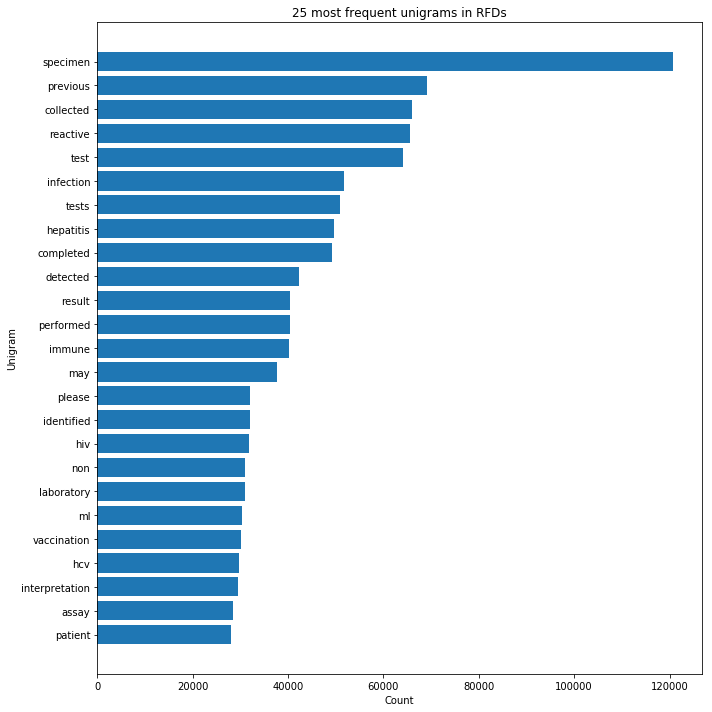

In [5]:
y = [-x for x in range(len(word_list))]
width = [x[1] for x in word_list]

plt.rcParams["figure.figsize"] = (10, 10)

plt.barh(y, width)

words = [x[0] for x in word_list]
plt.yticks(y, words)

plt.xlabel("Count")
plt.ylabel("Unigram")
plt.title("25 most frequent unigrams in RFDs")

plt.tight_layout()
plt.savefig("../figs/25_most_frequent_unigrams_in_RFDs.png")